In [2]:
# %timeit

### Data Science Analysis on Mental Health Survey Data (NSDUH)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2018 = pd.read_csv("NSDUH_2018_Tab.tsv", sep="\t", low_memory=False, encoding='unicode_escape')

NSDUH Study Details: https://datafiles.samhsa.gov/study-dataset/nsduh-2002-2018-ds0001-nsduh-2002-2018-ds0001-nid18772

Codebook/Documentation (p.364-586): http://samhda.s3-us-gov-west-1.amazonaws.com/s3fs-public/field-uploads-protected/studies/NSDUH-2018/NSDUH-2018-datasets/NSDUH-2018-DS0001/NSDUH-2018-DS0001-info/NSDUH-2018-DS0001-info-codebook.pdf

"Questions are about treatment & counseling for problems with emotions/nerves/mental health" excluding alcohol/drug use

- Adult Mental Health Treatment & Service Utilization
- Social & Home Environment
- Adult Depression
- Income & Insurance
- Employement
- Education
- Demographics
- Geographics

Dataset: National Survey taken in 2018, filed Oct. 2019

Disclaimer: Government survey data is subjective or heterogeneous by nature with sufficient/big data to
find interesting insights or problematic areas in mental health service utility that needs improvement.

In [5]:
df_2018.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


#### Data Cleaning

I am only interested in first two columns + all 'Adult Mental Health Service Utilization' related columns only

In [18]:
df_2018.columns

Index(['QUESTID2', 'FILEDATE', 'CIGEVER', 'CIGOFRSM', 'CIGWILYR', 'CIGTRY',
       'CIGYFU', 'CIGMFU', 'CIGREC', 'CIG30USE',
       ...
       'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10', 'COUTYP4', 'MAIIN102',
       'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP'],
      dtype='object', length=2691)

In [3]:
id_col = df_2018.loc[:,:'FILEDATE']

In [10]:
id_col.head()

,QUESTID2,FILEDATE
0,11015143,10/08/2019
1,86325143,10/08/2019
2,35425143,10/08/2019
3,98125143,10/08/2019
4,15945143,10/08/2019


In [4]:
# Drop columns not related to Adult MH Qs or relevant for target variable analysis
df_mh = df_2018.loc[:,'AUINPYR':]
df_mh.head()

,AUINPYR,AUINPSYH,AUINPGEN,AUINMEDU,AUINAHSP,AUINRESD,AUINSFAC,AUNMPSY2,AUNMPGE2,AUNMMED2,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,2,99,99,99,99,99,99,999,999,999,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,2,99,99,99,99,99,99,999,999,999,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,2,99,99,99,99,99,99,999,999,999,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,2,99,99,99,99,99,99,999,999,999,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,2,99,99,99,99,99,99,999,999,999,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


In [19]:
df_mh.shape

(56313, 1031)

In [5]:
id_col['FILEDATE'].describe()

count          56313
unique             1
top       10/08/2019
freq           56313
Name: FILEDATE, dtype: object

In [6]:
# Compile columns to a final dataset before further cleaning
merge_df = pd.concat([id_col, df_mh], axis=1)
merge_df.head(10)

,QUESTID2,FILEDATE,AUINPYR,AUINPSYH,AUINPGEN,AUINMEDU,AUINAHSP,AUINRESD,AUINSFAC,AUNMPSY2,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,2,99,99,99,99,99,99,999,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,99,99,99,99,999,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,2,99,99,99,99,99,99,999,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,99,99,99,99,999,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,99,99,99,99,999,...,2.0,1,2,1,1,2,2,6637.319591,40040,2
5,18455143,10/08/2019,2,99,99,99,99,99,99,999,...,3.0,2,2,2,2,2,2,156.545890,40014,1
6,21965143,10/08/2019,99,99,99,99,99,99,99,999,...,3.0,2,2,2,1,2,2,498.362648,40027,2
7,75326143,10/08/2019,2,99,99,99,99,99,99,999,...,1.0,2,2,2,2,2,2,2632.804528,40010,2
8,61726143,10/08/2019,2,99,99,99,99,99,99,999,...,1.0,2,2,1,1,2,2,2818.351816,40040,2
9,47126143,10/08/2019,99,99,99,99,99,99,99,999,...,3.0,2,2,1,1,2,2,1025.394304,40016,2


In [10]:
merge_df.shape

(56313, 1033)

In [7]:
# Convert date object to year only
import datetime
merge_df['FILEDATE'] = pd.DatetimeIndex(merge_df['FILEDATE']).year

In [18]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56313 entries, 0 to 56312
Columns: 1033 entries, QUESTID2 to VEREP
dtypes: float64(299), int64(733), object(1)
memory usage: 443.8+ MB


#### Target Variable: Predict adult receiving mental health treatment or not (AUUNMTYR or ADSEEDOCC).

##### Who can use this information to their benefit? Can I provide insight and give recommendations based on this analysis?
 - Public health departments, correctional institutions e.g. prison, lawmakers, employers (suffer cost or loss in productivity if employees with depression like symptoms don't seek treatment/get help. 

In [13]:
# Features (columns) to keep: ADULT MENTAL HEALTH SERVICE UTILITY, ADULT MENTAL HEALTH, ADULT DEPRESSION,
# INCOME & INSURANCE, EMPLOYMENT, EDUCATION, DEMOGRAPHICS(age,sex,income,race), GEOGRAPHIC
# - Demographics: Age, Marital status, military status(?), overall health, identity, education, 

In [8]:
# Eliminate features irrelevant to target variable
merge_df.drop(merge_df.iloc[:, 2:25], inplace=True, axis=1)
merge_df.drop(['AUPINFRE', 'AUPINFM2'], inplace=True, axis=1)
merge_df.drop(merge_df.loc[:,'YEATNDYR': 'RLGFRND'], inplace=True, axis=1)
merge_df.drop(merge_df.loc[:,'YODPREV':'YMDEIUDPY'], inplace=True, axis=1)

In [34]:
# Rename columns for easier navigation
# merge_df.rename(columns={'QUESTID2':'QUESTION', 'AUUNMTYR':'Target', 
#                  'AUUNRIM2': 'Reasons', 'AGE2':'Age',
#                 'EDUSCHGRD2':'EducationLevel', 'CAIDCHIP':'MEDICAID',
#                 'PRVHLTIN':'PrivInsurance', 'IRPINC3':'OwnIncome',
#                 'IRFAMIN3':'FamIncome', 'COUTYP4':'Metro'}, 
#                 inplace=True
#                )
merge_df.rename(columns={'ADDPR2WK':'Depr2WK', 'ADWRHRS':'DeprHours', 
                 'ADTMTNOW': 'CurrRcvTrmt', 'ADRX12MO':'PreMeds12',
                'ADRXNOW':'CurrTakeMeds', 'ADRXHLP':'MedsHelpful',
                'AUALTYR':'AltTrmt', 'AUNMTHE2':'PrTherapVisit',
                'ADSMMDEA':'5moreSymp', 'ADSEEDOC':'SeeProf12M'}, 
                inplace=True
               )

In [88]:
# Drop rows with answers '85,89,97,98,99' 
# merge_df.drop(merge_df[merge_df['Target'] == 85].index, inplace = True) 
# merge_df.drop(merge_df[merge_df['Target'] == 87].index, inplace = True) 
# merge_df.drop(merge_df[merge_df['Target'] == 94].index, inplace = True) 
# merge_df.drop(merge_df[merge_df['SeeProf12M'] == 97].index, inplace = True) 
merge_df.drop(merge_df[merge_df['WorkStatus'] == 98].index, inplace = True) 
merge_df.drop(merge_df[merge_df['WorkStatus'] == 99].index, inplace = True) 

In [36]:
merge_df.shape

(2121, 813)

In [39]:
# more dropping


#### Which Metric is Relevant to my Target?
If we predict an adult will receive mental health trmt/counseling, but they actually do not - it is arbitrarily good/bad and 'accuracy' would not provide much insight. 
Rather, I want to target adults who admit they DO need MH trmt and decide if they get it or not. 
- Hence, a false positive or RECALL score (rate of results correctly classified by algorithm) is more relevant in this case. 

### EDA
#### Insights from Data
ADDPR2WK - 10,602 felt depressed everyday for 2+ wks in 2018 (of data collected) - majority.

ADWRHR - Most answered severe/frequent mood lasted 5+ hrs *visualize time vs % - suggesting feelings e.g. depression are not temporary or bad moods

ADTMTNOW - 1786 currently receiving proff help with mood problems (442)

ADRX12MO - 2567 (minority) took pres meds in past 12m (for mood)

ADRXNOW - 2066 (less) adults currently taking presc meds (for mood).

ADRXHLP - Of those who answered, most found presc meds have helped a lot/some/extremely similar to ADTMTHLP trmt/counslg but more answered "1 = not at all" and overall had more answers than presc meds Q.

AUUNMTYR - 45,909 or ~7% answered yes they needed MH treatment but didn't get it in 2018

AUUNRIM2 - Did not think necessary, did not have time, stimatized/ashamed/embarrassed/afraid to, and affordability were most collected answers *Most important reasons for not getting treatment vs %

AUALTYR - 55,480 received alternative (not presc meds/inpatient/outpatient) mental health treatment in 2018* not mutually excluse to outpatient answers

AUNMTHE2 - Private therapy most popular outpatient visit in 2018. 


ADSMMDEA- More people have experienced combo of 5+ symptoms among adult depression

ADSEEDOCC- More people did not see professional about feelings related to adult depression (4005 to 3115)

In [38]:
# Set x,y variables for model fitting
X = merge_df.drop('Target', axis=1)
y = merge_df['Target']

merge_df.head(5)

,QUESTION,FILEDATE,AUOPTYR,AUOPMENT,AUOPTHER,AUOPDOC,AUOPCLNC,AUOPDTMT,AUOPOTOP,AUOPYRS2,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,Metro,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
3,98125143,2019,2,99,99,99,99,99,99,99,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
32,33419143,2019,2,99,99,99,99,99,99,99,...,2.0,2,2,2,2,2,2,3652.804729,40014,2
114,43440243,2019,2,99,99,99,99,99,99,99,...,1.0,2,2,2,2,2,2,1357.615481,40048,2
116,27040243,2019,2,99,99,99,99,99,99,99,...,2.0,1,2,2,2,2,2,827.542355,40042,2
195,71912343,2019,1,6,1,6,6,6,6,99,...,3.0,2,2,1,1,2,2,3749.403114,40033,1


In [40]:
round(merge_df['Target'].value_counts(normalize=True), 2)

2    0.64
1    0.36
Name: Target, dtype: float64

In [46]:
merge_df['Target'].value_counts()
# y.describe

2    1348
1     773
Name: Target, dtype: int64

EDA continued

In [ ]:
# Take subset of merge_df
# new_df = merge_df.loc[:,'WRKSTATWK2':]

In [55]:
merge_df['EducationLevel'].value_counts()

99    1688
11     143
10     139
9       96
98      29
8       20
7        2
5        1
1        1
6        1
4        1
Name: EducationLevel, dtype: int64

In [57]:
# Import Viz tools
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

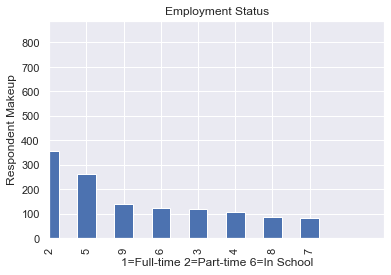

In [91]:
fig, ax = plt.subplots()
merge_df['WorkStatus'].value_counts().plot(kind='bar')
# sns.set_palette('BuGn_r')
plt.title('Employment Status')
plt.ylabel('Respondent Makeup')
ax.set_xlabel('1=Full-time 2=Part-time 6=In School')
ax.set_xlim(1,10)
plt.show()

# color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
#                       '#C1F0F6', '#0099CC']

# sns.barplot(x=merge_df[''],  
#             data = merge_df, palette=color_palette_list, 
#             label='', 
#             ax=ax)
# ax.set_title('')
# ax.set_ylabel(''% of Respondents')
# ax.set_ylim(0,12)
# ax.set_xlabel('')

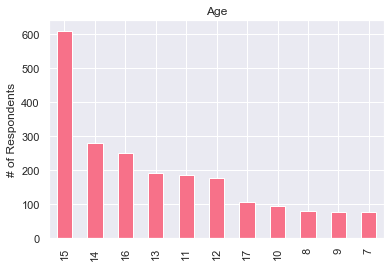

In [78]:
merge_df['Age'].value_counts().plot(kind='bar')
sns.set_palette('husl')
plt.title('Age')
plt.ylabel('# of Respondents')
plt.show()
# needs sorting

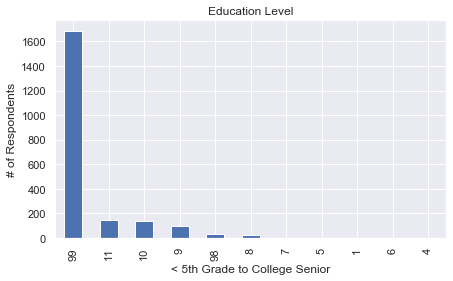

In [87]:
fig, ax = plt.subplots(figsize=(7,4))
merge_df['EducationLevel'].value_counts().plot(kind='bar')
sns.set_palette('deep')
plt.title('Education Level')
plt.ylabel('# of Respondents')
ax.set_xlabel('< 5th Grade to College Senior')
plt.show()
# sort by order 1-11

In [81]:
merge_df['FamIncome'].value_counts()

7    639
6    331
2    276
3    235
1    217
4    217
5    206
Name: FamIncome, dtype: int64

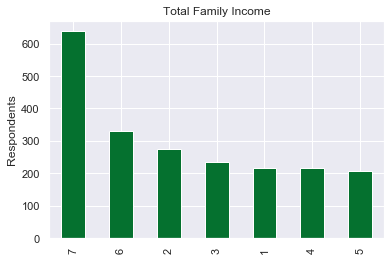

In [76]:
fig, ax = plt.subplots()
merge_df['FamIncome'].value_counts().plot(kind='bar')
sns.set_palette('BuGn_r')
plt.title('Total Family Income')
plt.ylabel('Respondents')
ax.set_xlabel('')
plt.show()

In [61]:
# Employment Status & Type
merge_df.rename(columns={'WRKSTATWK2':'WorkStatus'}, inplace=True)
merge_df.drop(merge_df.loc[:,'WRKLASTYR2': 'WRKOKRAND'], inplace=True, axis=1)
merge_df.drop(merge_df.loc[:,'IIKI17_2': 'PRXYDATA'], inplace=True, axis=1)

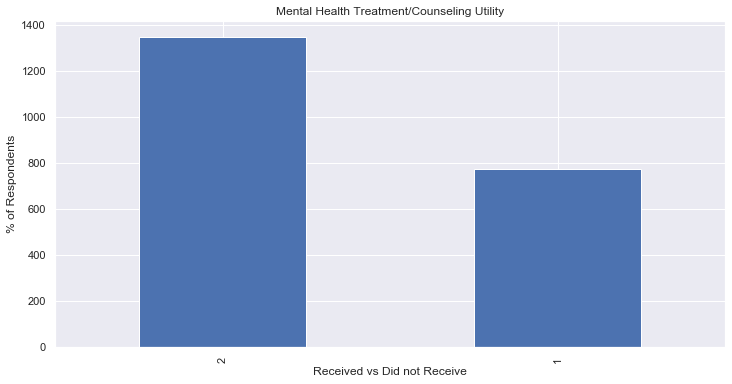

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
merge_df.Target.value_counts().plot(kind='bar')
sns.set_palette('deep')
plt.title('Mental Health Treatment/Counseling Utility')
ax.set_xlabel('Received vs Did not Receive')
plt.ylabel('% of Respondents')
plt.show()

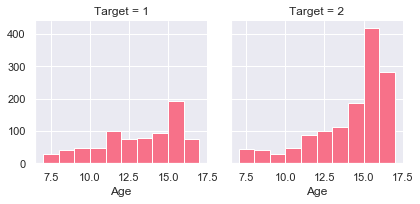

In [74]:
# Target Viz
sns.set(context='notebook',style='darkgrid', font='Arial')
sns.set_palette('husl')
g = sns.FacetGrid(merge_df, col='Target')
g.map(plt.hist, 'Age', bins=10)

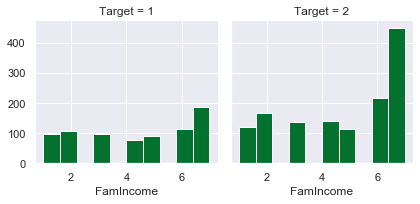

In [72]:
# Target Viz
sns.set(context='notebook',style='darkgrid', font='Arial')
sns.set_palette('BuGn_r')
g = sns.FacetGrid(merge_df, col='Target')
g.map(plt.hist, 'FamIncome', bins=10)

In [ ]:
# Target Viz: Pie Chart
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Bay Area / Silicon Valley', 
         'Non Bay Area / Silicon Valley']
percentages = [91, 9]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [ ]:
# Feature Engineering?

In [ ]:
# Use regularization (lasso) to find important features 

In [ ]:
# Check Multi-collinearity
merge_df.corr()>.75

In [ ]:
# Class imbalance


In [ ]:
merge_df.describe
# Chi-Sq
# ANOVA

In [ ]:
# Find P-values to eliminate features; chi-sq test, ANOVA

#### Train Data, Train-Test Split

In [ ]:
#pyspark
# Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1, stratify=y)

## Find MVP

#### Vanilla Model Fitting

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt_acc = round(dtc.score(X_train, y_train),3)
dt_acc

In [ ]:
# Logistic Regression
log = LogisticRegression()

log.fit(X_train,y_train)
# Y_pred = logreg.predict(X_test)
lr_acc = round(log.score(X_train,y_train),3)
lr_acc

In [ ]:
# Kernel SVM
from sklearn.svm import SVC, LinearSVC
sv = SVC()

sv.fit(X_train,y_train)
sv_acc = round(sv.score(X_train,y_train),3)
sv_acc

In [ ]:
# Random Forest
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
rf_acc = round(rf.score(X_train,y_train),3)
rf_acc

In [ ]:
# Neural Network

In [ ]:
# Gradient Boosted Tree